## Import Libraries

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the dataset

In [287]:
file = '10Alytics Hackathon- Fiscal Data.xlsx - Data.csv'
df = pd.read_csv(file)

## Checking dataset

In [288]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount
0,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213
1,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563
2,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379
3,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886
4,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138


In [289]:
print("Information:")
display(df.info())

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       23784 non-null  object
 1   Indicator     23784 non-null  object
 2   Source        23784 non-null  object
 3   Unit          23762 non-null  object
 4   Currency      13281 non-null  object
 5   Frequency     23784 non-null  object
 6   Country Code  23784 non-null  object
 7   Time          23780 non-null  object
 8   Amount        23725 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


None

In [290]:
print("Number of Missing Values")
df.isna().sum()

Number of Missing Values


Country             0
Indicator           0
Source              0
Unit               22
Currency        10503
Frequency           0
Country Code        0
Time                4
Amount             59
dtype: int64

In [291]:
print("Random Sample of Data")
df.sample(10)

Random Sample of Data


,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount
20044,Ivory Coast,Real GDP,Central Bank of West African States,Billion,XOF,Yearly,CIV,2016-01-01,23101.87
18956,Nigeria,Nominal GDP,Central Bank of Nigeria,Billion,NGN,Quarterly,NGA,2019-07-01,38222.34
20001,Ivory Coast,Real GDP,Central Bank of West African States,Billion,XOF,Yearly,CIV,1973-01-01,7417.88
1048,South Africa,Budget Deficit/Surplus,South African Reserve Bank,Million,ZAR,Monthly,ZAF,1999-07-01,1708
18317,South Africa,Labour Force,"Department of Statistics, South Africa",Persons,NaN,Quarterly,ZAF,2018-07-01,22589459.54
17717,South Africa,Interest Rate,South African Reserve Bank,%,NaN,Monthly,ZAF,2019-10-01,6.5
9391,Rwanda,GDP Growth Rate,National Institute of Statistics of Rwanda,Billion,RWF,Yearly,RWA,2007-01-01,7.6
7045,Nigeria,Exports,National Bureau of Statistics,Million,NGN,Quarterly,NGA,2014-01-01,3969478.63
14517,South Africa,Inflation Rate,"Department of Statistics, South Africa.",%,NaN,Monthly,ZAF,1965-08-01,3.8
12106,Nigeria,Imports,National Bureau of Statistics,Million,NGN,Monthly,NGA,2019-07-01,1403219


In [292]:
print("\nUnique Countries:")
display(df['Country'].unique())


Unique Countries:


array(['Egypt', 'Ethiopia', 'Ghana', 'Ivory Coast', 'Nigeria',
       'South Africa', 'Tanzania', 'Togo', 'Senegal', 'Kenya', 'Rwanda',
       'Algeria', 'Angola', 'Botswana'], dtype=object)

## Cleaning the Dataset

In [293]:
# 1. Clean 'Amount' column
# Remove commas and convert to numeric, coercing errors to NaN

df['Amount_Cleaned'] = pd.to_numeric(df['Amount'].astype(str).str.replace(',', ''), errors='coerce')
df['Amount_Cleaned'] = df['Amount_Cleaned'].fillna(df['Amount_Cleaned'].median())

In [294]:
# 2. Clean 'Time' column
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Time'] = df['Time'].ffill().bfill()
df['Year'] = df['Time'].dt.year

In [295]:
# 3. Clean 'Unit' column
df['Unit'] = df['Unit'].fillna(df['Unit'].mode()[0])

In [296]:
# 4. Standardize Units
# We need to be careful. Percentage indicators stay as is.
# Financial amounts (Billion/Million) need standardization.
# Let's verify which indicators are financial and which are rates.

def normalize_amount(row):
    unit = str(row['Unit']).lower()
    amount = row['Amount_Cleaned']
    if pd.isna(amount):
        return np.nan
    
    if 'billion' in unit:
        return amount * 1000 # Convert to Million
    elif 'million' in unit:
        return amount # Already in Million
    else:
        return amount # Keep as is (likely %, Points, or Persons)

df['Normalized_Amount'] = df.apply(normalize_amount, axis=1)

In [297]:
# Drop duplicate values
df.drop_duplicates()

,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount,Amount_Cleaned,Year,Normalized_Amount
0,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213,-56213.0,2007,-56213.0
1,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563,-67563.0,2008,-67563.0
2,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379,-72379.0,2009,-72379.0
3,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886,-98886.0,2010,-98886.0
4,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138,-134138.0,2011,-134138.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23779,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2019-01-01,4781.6,4781.6,2019,4781600.0
23780,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2020-01-01,5184,5184.0,2020,5184000.0
23781,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2021-01-01,5218,5218.0,2021,5218000.0
23782,Tanzania,Value Added Tax (VAT),"National Statistics Office, Tanzania",Billion,TZS,Yearly,TZA,2022-01-01,6298,6298.0,2022,6298000.0


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Country            23784 non-null  object        
 1   Indicator          23784 non-null  object        
 2   Source             23784 non-null  object        
 3   Unit               23784 non-null  object        
 4   Currency           13281 non-null  object        
 5   Frequency          23784 non-null  object        
 6   Country Code       23784 non-null  object        
 7   Time               23784 non-null  datetime64[ns]
 8   Amount             23725 non-null  object        
 9   Amount_Cleaned     23784 non-null  float64       
 10  Year               23784 non-null  int32         
 11  Normalized_Amount  23784 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(8)
memory usage: 2.1+ MB


## Exploratory Data Analysis

In [299]:
# Check the indicators again to separate Financials from Rates
indicators = df['Indicator'].unique()
print(indicators)


['Budget Deficit/Surplus' 'Capital Expenditure'
 'Consumer Price Index (CPI)' 'Defence Expenditure'
 'Education Expenditure' 'Expenditure' 'Exports' 'Food Inflation '
 'Food Inflation YoY' 'GDP Growth Rate' 'GDP per Capita' 'GDP per capita'
 'GDP per Capita ' 'Government Debt' 'Health Expenditure' 'Imports'
 'Inflation Rate' 'Inflation Rate ' 'Interest Rate' 'Labour Force'
 'Nominal GDP' 'Population' 'Real GDP' 'Revenue' 'Tax Revenue'
 'Unemployment Rate' 'Value Added Tax (VAT)']


In [300]:
# Looking at "Frequency" column to help pivot data
freq_counts = df['Frequency'].value_counts()
print(freq_counts)

Frequency
Monthly      16850
Yearly        3710
Quarterly     3224
Name: count, dtype: int64


###### Pivot the data
# We want: Index=[Country, Year], Columns=Indicator, Values=Normalized_Amount
df_pivot = df.pivot_table(index=['Country', 'Year'], columns='Indicator', values='Normalized_Amount', aggfunc='mean')

# Display first few rows of pivoted data
print(df_pivot.head())
print(df_pivot.columns)
print(df['Frequency'].value_counts())

In [301]:
# Consolidate column names
df['Indicator'] = df['Indicator'].str.strip() # Remove trailing spaces
df['Indicator'] = df['Indicator'].replace({
    'GDP per Capita': 'GDP per capita',
    'GDP per Capita ': 'GDP per capita',
    'Inflation Rate ': 'Inflation Rate',
    'Food Inflation ': 'Food Inflation',
    'Food Inflation YoY': 'Food Inflation'
})

In [302]:
# Check frequencies per indicator
display(df.groupby(['Indicator', 'Frequency']).size())

Indicator                   Frequency
Budget Deficit/Surplus      Monthly      1123
                            Quarterly      59
                            Yearly        235
Capital Expenditure         Monthly       473
                            Quarterly      20
                            Yearly        170
Consumer Price Index (CPI)  Monthly      2796
                            Yearly         54
Defence Expenditure         Yearly        140
Education Expenditure       Yearly         19
Expenditure                 Monthly       636
                            Quarterly      59
                            Yearly        266
Exports                     Monthly       988
                            Quarterly     316
                            Yearly        307
Food Inflation              Monthly      1090
                            Yearly          9
GDP Growth Rate             Quarterly     648
                            Yearly        314
GDP per capita              Quarterly     

In [303]:
# Specific check for flow and rate variables
flow_vars = ['Budget Deficit/Surplus', 'Revenue', 'Expenditure', 'Exports', 'Imports', 'Nominal GDP', 'Real GDP', 'Tax Revenue', 'Capital Expenditure', 'Defence Expenditure', 'Education Expenditure', 'Health Expenditure']
rate_vars = ['Inflation Rate', 'unemployment Rate', 'Interest Rate', 'Consumer Price Index (CPI)', 'GDP Growth Rate']


In [304]:
# Filter relevant columns and Pivot
# We will create two pivots: one for yearly sums (flows) and one for yearly means (rates)
# But we need to know which is which in the original data frequency.
# If original is Yearly, Sum/Mean is same (1 value).
# If original is Monthly, we need to decide.
# Most Fiscal data (Deficit, Revenue) is often Monthly.
# Let's inspect "Budget Deficit/Surplus" frequency specifically.
print(df[df['Indicator'] == 'Budget Deficit/Surplus']['Frequency'].value_counts())

Frequency
Monthly      1123
Yearly        235
Quarterly      59
Name: count, dtype: int64


In [305]:
# Define aggregation method
# Note: Government Debt is a stock, usually we take at the end of period, but Mean is a proxy.
# Flows: Sum
flows = ['Budget Deficit/Surplus', 'Capital Expenditure', 'Defence Expenditure', 'Education Expenditure', 
         'Expenditure', 'Exports', 'Health Expenditure', 'Imports', 'Nominal GDP', 'Real GDP', 
         'Revenue', 'Tax Revenue', 'Value Added Tax (VAT)']


In [306]:
# Rates/Indices: Mean
rates = ['Consumer Price Index (CPI)', 'Food Inflation', 'GDP Growth Rate', 'GDP per capita', 
         'Government Debt', 'Inflation Rate', 'Interest Rate', 'Labour Force', 'Population', 
         'Unemployment Rate']

In [307]:
# Create a function to aggregate
def aggregate_indicator(group):
    ind = group['Indicator'].iloc[0]
    if ind in flows:
        return group['Normalized_Amount'].sum()
    else:
        return group['Normalized_Amount'].mean()


In [308]:
# Group by Country, Year, Indicator
df_agg = df.groupby(['Country', 'Year', 'Indicator']).apply(aggregate_indicator).reset_index(name='Amount_Yearly')

C:\Users\CHIDIMMA\AppData\Local\Temp\ipykernel_35188\2383484525.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['Country', 'Year', 'Indicator']).apply(aggregate_indicator).reset_index(name='Amount_Yearly')


In [309]:
# Pivot for easier plotting and modeling
df_pivot_yearly = df_agg.pivot_table(index=['Country', 'Year'], columns='Indicator', values='Amount_Yearly').reset_index()

In [310]:
# Display
display(df_pivot_yearly.head())
display(df_pivot_yearly.columns)

# Save for potential tool use (though I will just plot here)
# df_pivot_yearly.to_csv('cleaned_fiscal_data.csv')

Indicator,Country,Year,Budget Deficit/Surplus,Capital Expenditure,Consumer Price Index (CPI),Defence Expenditure,Education Expenditure,Expenditure,Exports,Food Inflation,...,Inflation Rate,Interest Rate,Labour Force,Nominal GDP,Population,Real GDP,Revenue,Tax Revenue,Unemployment Rate,Value Added Tax (VAT)
0,Algeria,1977,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,1978,NaN,NaN,NaN,NaN,NaN,NaN,6300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,1979,NaN,NaN,NaN,NaN,NaN,NaN,9500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,1980,NaN,NaN,NaN,NaN,NaN,NaN,13700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,1981,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['Country', 'Year', 'Budget Deficit/Surplus', 'Capital Expenditure',
       'Consumer Price Index (CPI)', 'Defence Expenditure',
       'Education Expenditure', 'Expenditure', 'Exports', 'Food Inflation',
       'GDP Growth Rate', 'GDP per capita', 'Government Debt',
       'Health Expenditure', 'Imports', 'Inflation Rate', 'Interest Rate',
       'Labour Force', 'Nominal GDP', 'Population', 'Real GDP', 'Revenue',
       'Tax Revenue', 'Unemployment Rate', 'Value Added Tax (VAT)'],
      dtype='object', name='Indicator')

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Country            23784 non-null  object        
 1   Indicator          23784 non-null  object        
 2   Source             23784 non-null  object        
 3   Unit               23784 non-null  object        
 4   Currency           13281 non-null  object        
 5   Frequency          23784 non-null  object        
 6   Country Code       23784 non-null  object        
 7   Time               23784 non-null  datetime64[ns]
 8   Amount             23725 non-null  object        
 9   Amount_Cleaned     23784 non-null  float64       
 10  Year               23784 non-null  int32         
 11  Normalized_Amount  23784 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(8)
memory usage: 2.1+ MB


In [312]:
# Check data availability for key countries
countries = ['Egypt', 'Nigeria', 'South Africa', 'Kenya', 'Tanzania']
check_cols = ['Budget Deficit/Surplus', 'Nominal GDP', 'Revenue', 'Expenditure']

for c in countries:
    data_c = df_pivot_yearly[df_pivot_yearly['Country'] == c]
    print(f"\n{c}:")
    print(data_c[check_cols].count())


Egypt:
Indicator
Budget Deficit/Surplus    18
Nominal GDP               42
Revenue                   18
Expenditure               18
dtype: int64

Nigeria:
Indicator
Budget Deficit/Surplus    15
Nominal GDP               44
Revenue                   15
Expenditure               15
dtype: int64

South Africa:
Indicator
Budget Deficit/Surplus    66
Nominal GDP               32
Revenue                   66
Expenditure                0
dtype: int64

Kenya:
Indicator
Budget Deficit/Surplus     0
Nominal GDP               25
Revenue                   26
Expenditure               26
dtype: int64

Tanzania:
Indicator
Budget Deficit/Surplus    14
Nominal GDP               20
Revenue                   15
Expenditure               14
dtype: int64


In [313]:
# Calculate Deficit to GDP Ratio where possible
# Note: Deficit is usually negative.
# We need to ensure units match.
# Deficit units: Normalized to Million.
# Nominal GDP units: Normalized to Million.
# So Ratio = (Deficit / GDP) * 100

df_pivot_yearly['Deficit_to_GDP'] = (df_pivot_yearly['Budget Deficit/Surplus'] / df_pivot_yearly['Nominal GDP']) * 100

## Visualization

C:\Users\CHIDIMMA\AppData\Local\Temp\ipykernel_35188\418769575.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_stats, x='Deficit_to_GDP', y='Country', palette=colors)


Chart generated.
        Country  Deficit_to_GDP
0         Egypt      -13.544765
1       Senegal       -4.784004
2       Nigeria       -4.174318
3   Ivory Coast       -3.890612
4         Ghana       -2.964223
5          Togo       -2.916478
6      Ethiopia       -2.914925
7      Tanzania       -2.222081
8  South Africa       -1.761192


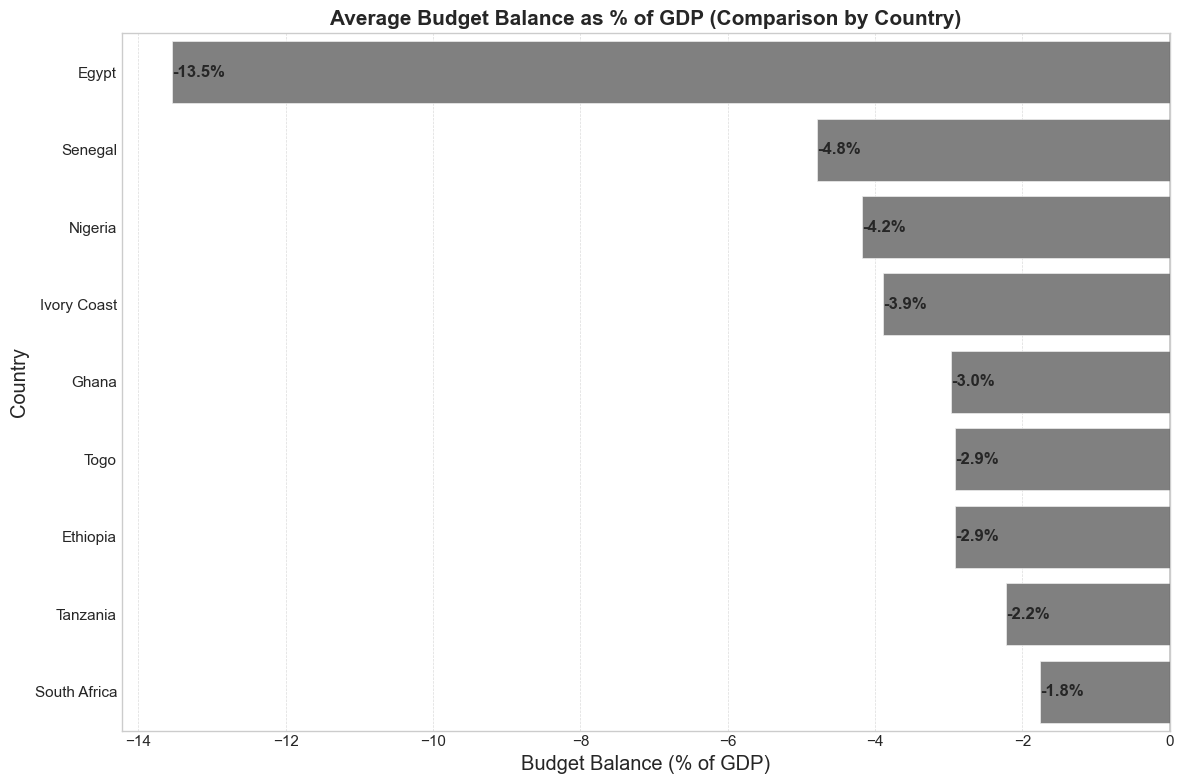

In [327]:


# Filter for relevant indicators
# We need Budget Deficit/Surplus. We also need Nominal GDP for normalization.
indicators = ['Nominal GDP', 'Budget Deficit/Surplus']
df_filtered = df[df['Indicator'].isin(indicators)].copy()

# Aggregation (Sum flows by year)
df_agg = df_filtered.groupby(['Country', 'Year', 'Indicator'])['Normalized_Amount'].sum().reset_index()

# Pivot
df_pivot = df_agg.pivot_table(index=['Country', 'Year'], columns='Indicator', values='Normalized_Amount').reset_index()

# Calculate Ratio
# We only keep rows where we have both Deficit and GDP to calculate the ratio
df_ratio = df_pivot.dropna(subset=['Nominal GDP', 'Budget Deficit/Surplus']).copy()
df_ratio['Deficit_to_GDP'] = (df_ratio['Budget Deficit/Surplus'] / df_ratio['Nominal GDP']) * 100

# Aggregate by Country (Mean of the Ratio)
country_stats = df_ratio.groupby('Country')['Deficit_to_GDP'].mean().sort_values().reset_index()

# Visualization
plt.figure(figsize=(12, 8))
# Color bars: Red for Deficit (negative), Green for Surplus (positive)
colors = ['grey' if x < 0 else 'green' for x in country_stats['Deficit_to_GDP']]
sns.barplot(data=country_stats, x='Deficit_to_GDP', y='Country', palette=colors)

plt.title('Average Budget Balance as % of GDP (Comparison by Country)', fontsize=15, fontweight='bold')
plt.xlabel('Budget Balance (% of GDP)')
plt.ylabel('Country')
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels
for index, value in enumerate(country_stats['Deficit_to_GDP']):
    plt.text(value, index, f'{value:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('budget_deficit_per_country.png')

print("Chart generated.")
print(country_stats)

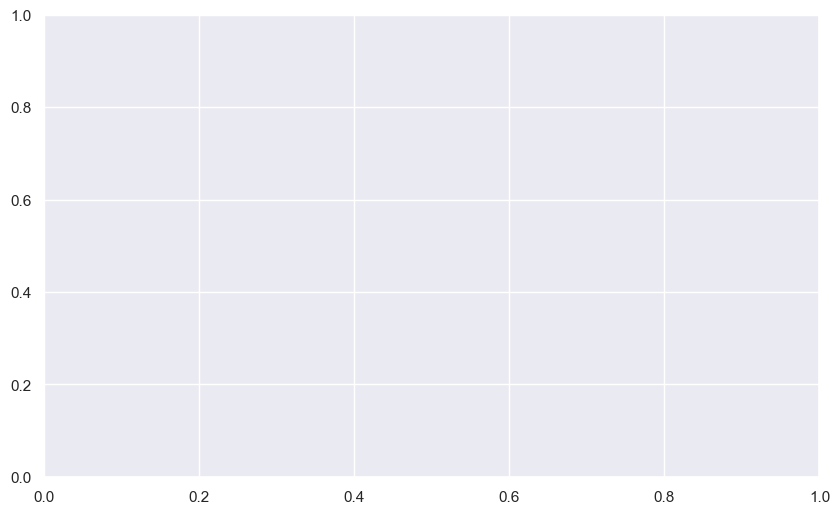

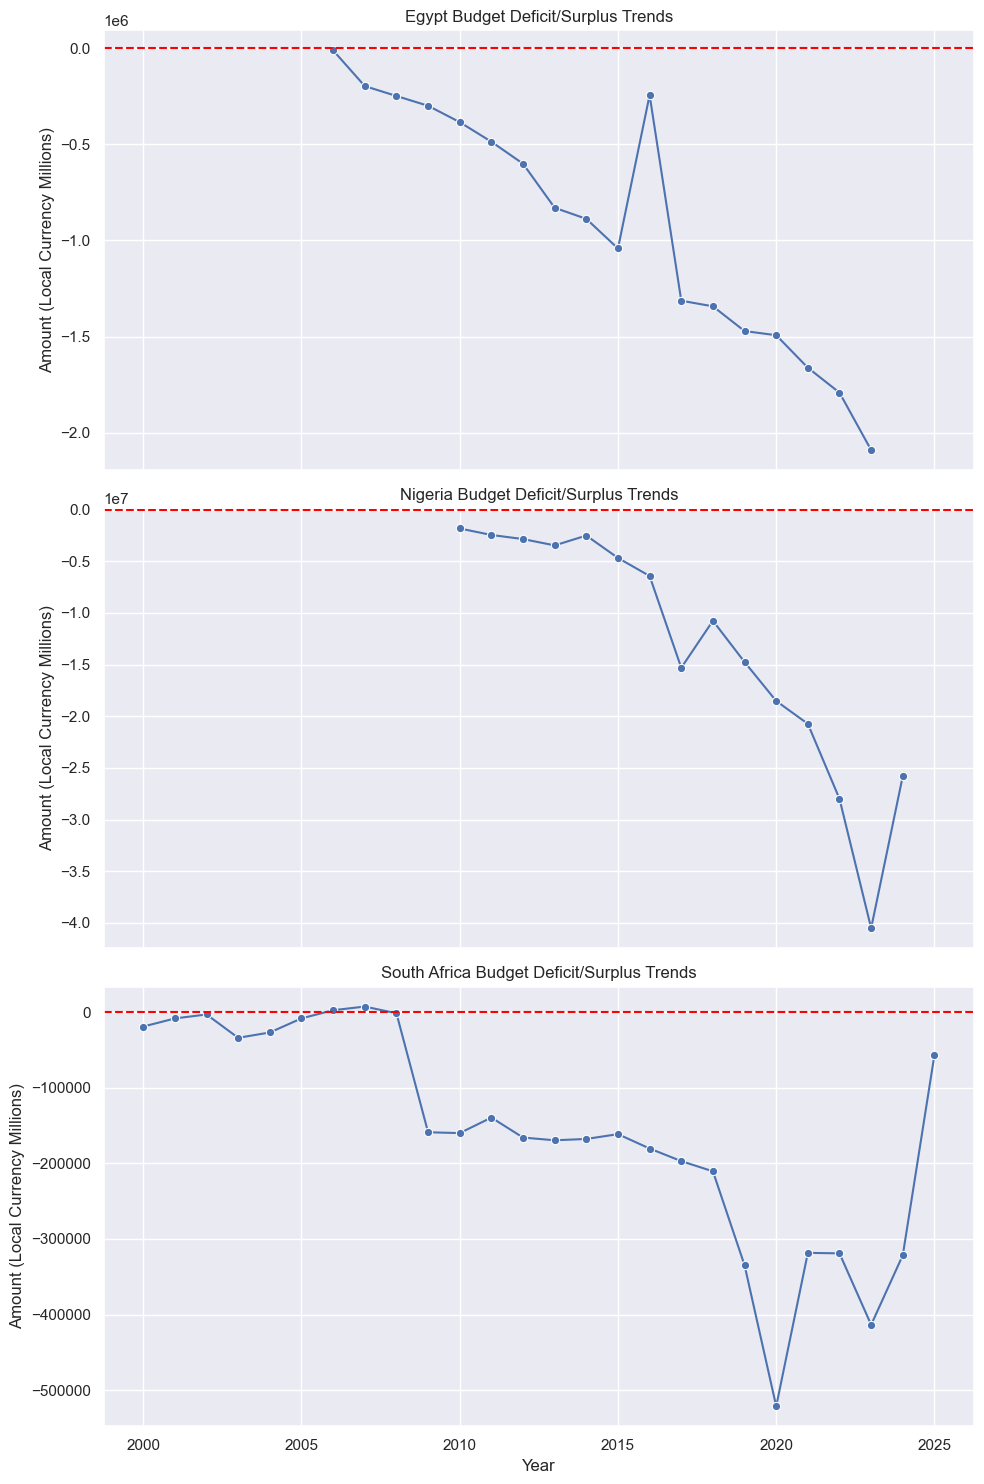

In [314]:
# 1. Deficit Trends Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

countries_plot = ['Egypt', 'Nigeria', 'South Africa']
for c in countries_plot:
    data = df_pivot_yearly[df_pivot_yearly['Country'] == c].dropna(subset=['Budget Deficit/Surplus'])
    if not data.empty:
        #Standardize by dividing by mean to show relative trend on same graph, or just plot one
        # Let's plot separate or use subplots. Subplots is better.
        pass


# Re-doing with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
for i, c in enumerate(countries_plot):
    data = df_pivot_yearly[df_pivot_yearly['Country'] == c]
    # Filter years > 2000 for better visibility
    data = data[data['Year'] >= 2000]
    
    ax = axes[i]
    if not data['Budget Deficit/Surplus'].dropna().empty:
        sns.lineplot(x='Year', y='Budget Deficit/Surplus', data=data, ax=ax, marker='o')
        ax.set_title(f'{c} Budget Deficit/Surplus Trends')
        ax.set_ylabel('Amount (Local Currency Millions)')
        ax.axhline(0, color='red', linestyle='--')
    else:
        ax.text(0.5, 0.5, 'No Data', transform=ax.transAxes, ha='center')
        ax.set_title(f'{c} - No Data')

plt.tight_layout()
plt.savefig('deficit_trends.png')

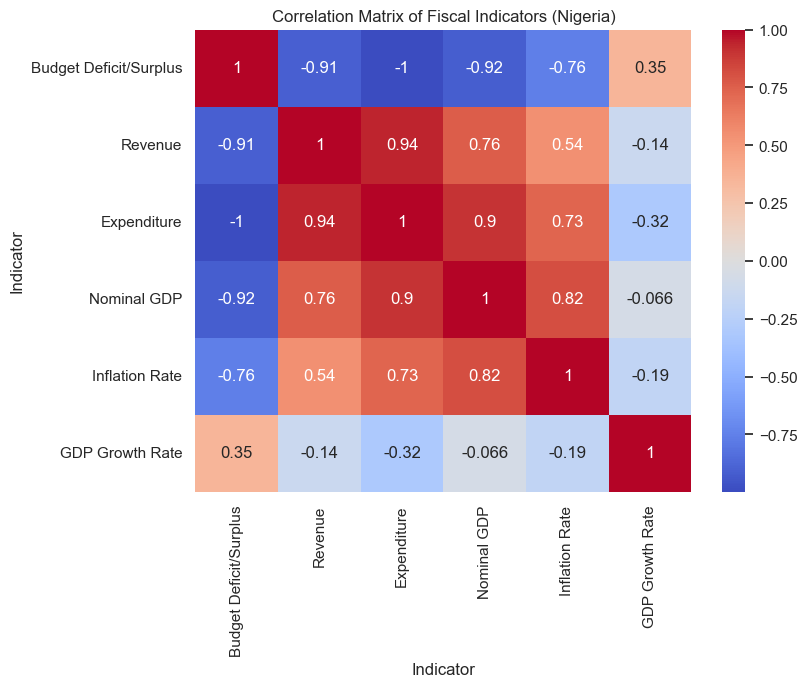

In [315]:
# 2. Drivers Analysis (Nigeria)
# Calculate Correlation
egypt_data = df_pivot_yearly[df_pivot_yearly['Country'] == 'Nigeria'].dropna(axis=1, how='all')
# Select numeric columns
cols = ['Budget Deficit/Surplus', 'Revenue', 'Expenditure', 'Nominal GDP', 'Inflation Rate', 'GDP Growth Rate']
# Intersect with available columns
cols = [c for c in cols if c in egypt_data.columns]
corr = egypt_data[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Fiscal Indicators (Nigeria)')
plt.savefig('Nigeria_correlation.png')


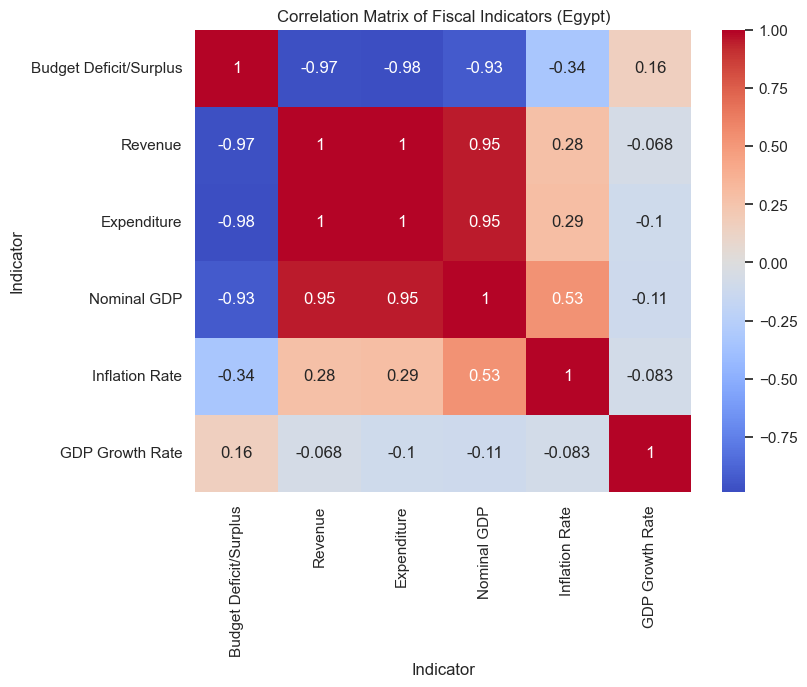

In [316]:
# 2. Drivers Analysis (Egypt)
# Calculate Correlation
egypt_data = df_pivot_yearly[df_pivot_yearly['Country'] == 'Egypt'].dropna(axis=1, how='all')
# Select numeric columns
cols = ['Budget Deficit/Surplus', 'Revenue', 'Expenditure', 'Nominal GDP', 'Inflation Rate', 'GDP Growth Rate']
# Intersect with available columns
cols = [c for c in cols if c in egypt_data.columns]
corr = egypt_data[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Fiscal Indicators (Egypt)')
plt.savefig('egypt_correlation.png')


C:\Users\CHIDIMMA\AppData\Local\Temp\ipykernel_35188\2819123888.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['Country', 'Year', 'Indicator']).apply(agg_func).reset_index(name='Amount_Yearly')


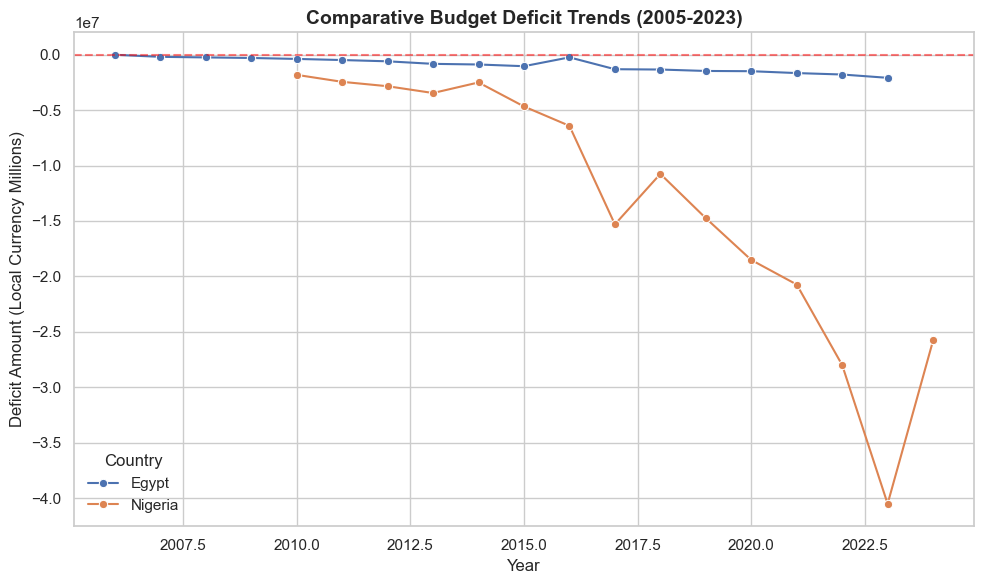

In [317]:
# Define Flow vs Rate variables for correct aggregation
flows = ['Budget Deficit/Surplus', 'Revenue', 'Expenditure', 'Nominal GDP', 
         'Capital Expenditure', 'Defence Expenditure', 'Education Expenditure', 'Health Expenditure']
# Function to aggregate: Sum for flows, Mean for rates
def agg_func(group):
    ind = group['Indicator'].iloc[0]
    if ind in flows:
        return group['Normalized_Amount'].sum()
    else:
        return group['Normalized_Amount'].mean()

# Aggregate to Yearly level
df_agg = df.groupby(['Country', 'Year', 'Indicator']).apply(agg_func).reset_index(name='Amount_Yearly')
df_pivot = df_agg.pivot_table(index=['Country', 'Year'], columns='Indicator', values='Amount_Yearly').reset_index()

# Calculate Deficit to GDP Ratio
df_pivot['Deficit_to_GDP'] = (df_pivot['Budget Deficit/Surplus'] / df_pivot['Nominal GDP']) * 100

# --- 3. Visualization ---
sns.set_style("whitegrid")

# Figure 1: Historical Deficit Trends (Egypt vs Nigeria)
fig1, ax1 = plt.subplots(figsize=(10, 6))
countries = ['Egypt', 'Nigeria']
subset = df_pivot[df_pivot['Country'].isin(countries)].dropna(subset=['Budget Deficit/Surplus'])
subset = subset[subset['Year'] >= 2005] # Focus on recent history
sns.lineplot(data=subset, x='Year', y='Budget Deficit/Surplus', hue='Country', marker='o', ax=ax1)
ax1.set_title('Comparative Budget Deficit Trends (2005-2023)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Deficit Amount (Local Currency Millions)')
ax1.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('Comparative Budget Deficit Trends (2005-2023).png')




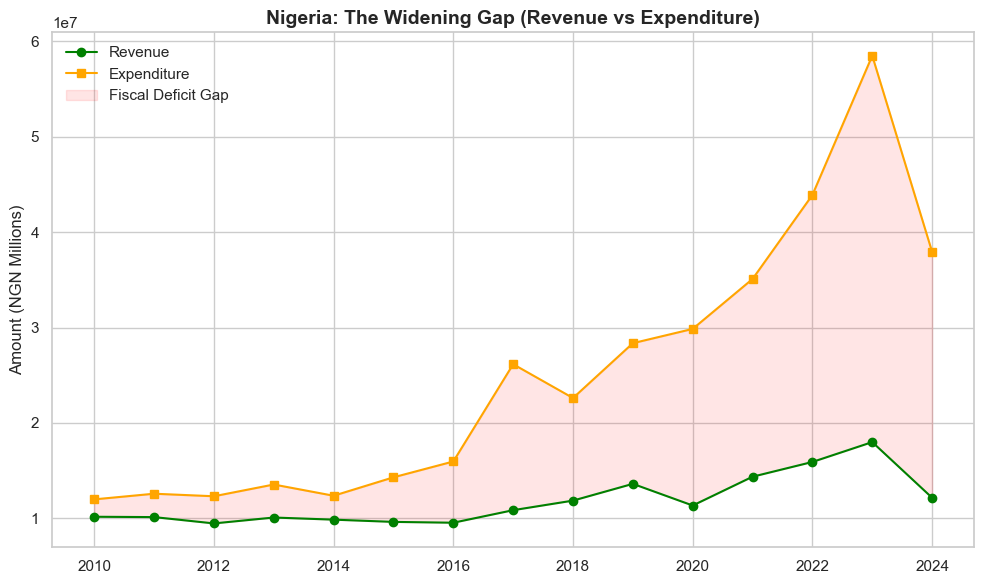

In [318]:
# Figure 2: Revenue vs Expenditure (Nigeria Driver Analysis)
fig2, ax2 = plt.subplots(figsize=(10, 6))
nigeria = df_pivot[df_pivot['Country'] == 'Nigeria'].sort_values('Year')
ax2.plot(nigeria['Year'], nigeria['Revenue'], label='Revenue', marker='o', color='green')
ax2.plot(nigeria['Year'], nigeria['Expenditure'], label='Expenditure', marker='s', color='orange')
ax2.fill_between(nigeria['Year'], nigeria['Revenue'], nigeria['Expenditure'], where=(nigeria['Expenditure'] > nigeria['Revenue']), color='red', alpha=0.1, label='Fiscal Deficit Gap')
ax2.set_title('Nigeria: The Widening Gap (Revenue vs Expenditure)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Amount (NGN Millions)')
ax2.legend()
plt.tight_layout()



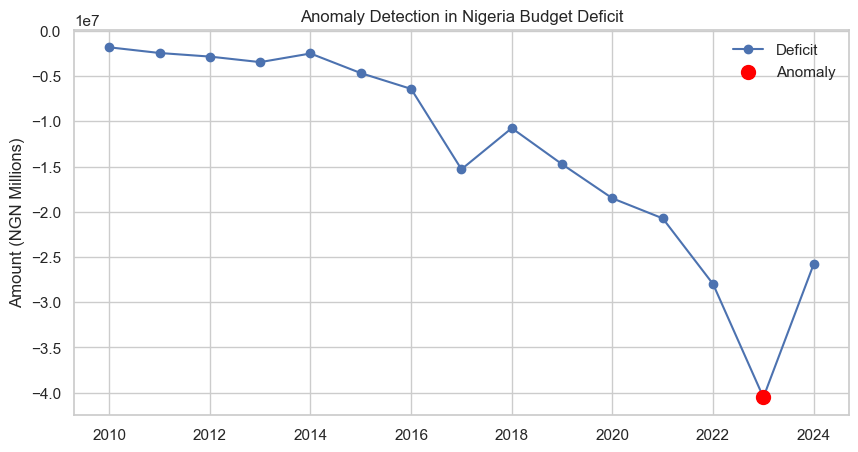

In [319]:
# 3. Anomaly Detection (Nigeria)
# Using Z-score of Deficit
nigeria_data = df_pivot_yearly[df_pivot_yearly['Country'] == 'Nigeria'].copy()
nigeria_data = nigeria_data.dropna(subset=['Budget Deficit/Surplus']).sort_values('Year')

# Calculate Z-score
mu = nigeria_data['Budget Deficit/Surplus'].mean()
sigma = nigeria_data['Budget Deficit/Surplus'].std()
nigeria_data['Deficit_Z'] = (nigeria_data['Budget Deficit/Surplus'] - mu) / sigma

# Highlight anomalies (|Z| > 1.5 for demonstration)
anomalies = nigeria_data[np.abs(nigeria_data['Deficit_Z']) > 1.5]

plt.figure(figsize=(10, 5))
plt.plot(nigeria_data['Year'], nigeria_data['Budget Deficit/Surplus'], marker='o', label='Deficit')
plt.scatter(anomalies['Year'], anomalies['Budget Deficit/Surplus'], color='red', s=100, label='Anomaly', zorder=5)
plt.title('Anomaly Detection in Nigeria Budget Deficit')
plt.ylabel('Amount (NGN Millions)')
plt.legend()
plt.savefig('nigeria_anomaly.png')


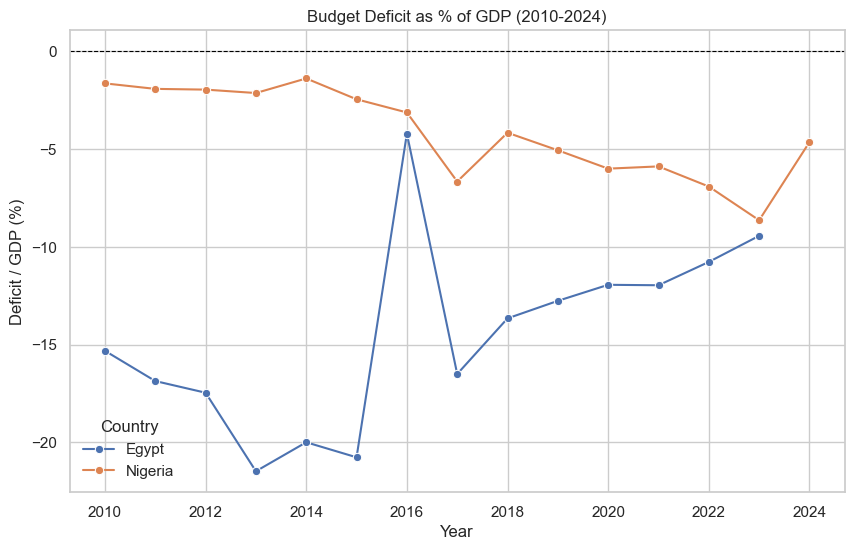

In [320]:
# Budget Deficit as % of GDP (2010-2024)
fig, ax = plt.subplots(figsize=(10, 6))
# Filter for Egypt and Nigeria
plot_data = df_pivot_yearly[df_pivot_yearly['Country'].isin(['Egypt', 'Nigeria'])].dropna(subset=['Deficit_to_GDP'])
plot_data = plot_data[plot_data['Year'] >= 2010]

sns.lineplot(x='Year', y='Deficit_to_GDP', hue='Country', data=plot_data, marker='o')
ax.set_title('Budget Deficit as % of GDP (2010-2024)')
ax.set_ylabel('Deficit / GDP (%)')
ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.savefig('deficit_to_gdp.png')

## Prdictive Modelling

In [321]:
# Prediction (Nigeria)
# Predict next year using linear trend 

# Prepare data
X = nigeria_data[['Year']]
y = nigeria_data['Budget Deficit/Surplus']

if len(X) > 1:
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict next 3 years
    last_year = nigeria_data['Year'].max()
    future_years = np.array([[last_year + 1], [last_year + 2], [last_year + 3]])
    predictions = model.predict(future_years)
    
    print("Nigeria Deficit Forecast:")
    for yr, pred in zip(future_years.flatten(), predictions):
        print(f"Year {int(yr)}: {pred:,.2f}")
else:
    print("Not enough data for Nigeria prediction")

Nigeria Deficit Forecast:
Year 2025: -32,185,646.93
Year 2026: -34,554,631.62
Year 2027: -36,923,616.30


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Focus on SDG relevant indicators

C:\Users\CHIDIMMA\AppData\Local\Temp\ipykernel_35188\3616444178.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sdg = df[df['Indicator'].isin(sdg_indicators)].groupby(['Country', 'Year', 'Indicator']).apply(agg_func).reset_index(name='Value')


Available columns for Nigeria: Index(['Budget Deficit/Surplus', 'Defence Expenditure', 'Food Inflation',
       'Health Expenditure', 'Revenue', 'Unemployment Rate'],
      dtype='object', name='Indicator')


Indicator,Budget Deficit/Surplus,Defence Expenditure,Food Inflation,Health Expenditure,Revenue,Unemployment Rate
Year,,,,,,
2021,-20730498.0,612530.0,20.491667,386240.0,14365347.0,NaN
2022,-27991116.0,693850.0,20.825000,437520.0,15911616.0,NaN
2023,-40505457.0,743200.0,27.750000,468640.0,17994780.0,NaN
2024,-25777864.0,NaN,39.095833,NaN,12157582.0,NaN
2025,NaN,NaN,22.547500,NaN,NaN,NaN


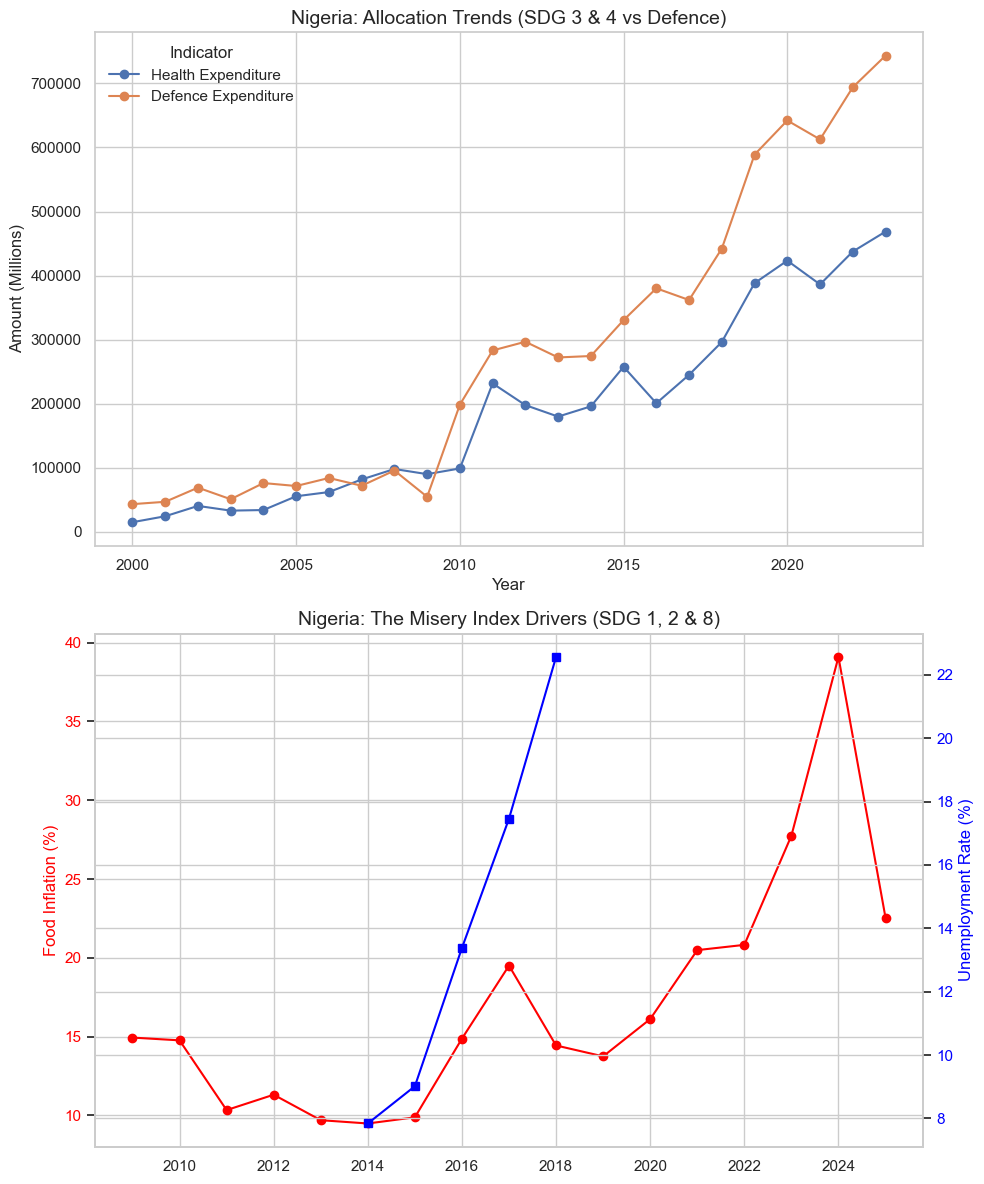

In [322]:
# 1. Aggregation

sdg_indicators = [
    'Health Expenditure', 'Education Expenditure', 'Defence Expenditure', 
    'Food Inflation', 'Unemployment Rate', 'Revenue', 'Budget Deficit/Surplus'
]

# Simple aggregation function
def agg_func(group):
    # If it's a rate/index, take mean. If it's a flow (Expenditure/Revenue), take sum.
    ind = group['Indicator'].iloc[0]
    if 'Inflation' in ind or 'Rate' in ind or 'Index' in ind:
        return group['Normalized_Amount'].mean()
    else:
        return group['Normalized_Amount'].sum()

df_sdg = df[df['Indicator'].isin(sdg_indicators)].groupby(['Country', 'Year', 'Indicator']).apply(agg_func).reset_index(name='Value')

# 2. Visualization for SDG Insights (Nigeria Focus)
country = 'Nigeria'
data_nig = df_sdg[df_sdg['Country'] == country]

sns.set_style("whitegrid")

# Plot A: The "Crowding Out" Effect (SDG 3, 4 vs Security)
# We need to pivot to get columns
df_pivot = data_nig.pivot(index='Year', columns='Indicator', values='Value')

# Check availability
print("Available columns for Nigeria:", df_pivot.columns)

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Subplot 1: Social vs Defence Spending (if available)
# If Defence is missing, we will just show Health/Edu trends
spending_cols = ['Health Expenditure', 'Education Expenditure', 'Defence Expenditure']
avail_spending = [c for c in spending_cols if c in df_pivot.columns]

if avail_spending:
    df_pivot[avail_spending].plot(ax=axes[0], marker='o')
    axes[0].set_title(f'{country}: Allocation Trends (SDG 3 & 4 vs Defence)', fontsize=14)
    axes[0].set_ylabel('Amount (Millions)')
else:
    axes[0].text(0.5, 0.5, 'Insufficient Spending Data', ha='center')

# Subplot 2: Cost of Living (SDG 1 & 2) - Food Inflation vs Unemployment
rate_cols = ['Food Inflation', 'Unemployment Rate']
avail_rates = [c for c in rate_cols if c in df_pivot.columns]

if avail_rates:
    ax2 = axes[1]
    # Dual axis might be better if scales differ significantly
    if 'Food Inflation' in df_pivot.columns:
        ax2.plot(df_pivot.index, df_pivot['Food Inflation'], color='red', marker='o', label='Food Inflation')
        ax2.set_ylabel('Food Inflation (%)', color='red')
        ax2.tick_params(axis='y', labelcolor='red')
    
    if 'Unemployment Rate' in df_pivot.columns:
        ax3 = ax2.twinx()
        ax3.plot(df_pivot.index, df_pivot['Unemployment Rate'], color='blue', marker='s', label='Unemployment Rate')
        ax3.set_ylabel('Unemployment Rate (%)', color='blue')
        ax3.tick_params(axis='y', labelcolor='blue')
    
    axes[1].set_title(f'{country}: The Misery Index Drivers (SDG 1, 2 & 8)', fontsize=14)

plt.tight_layout()
plt.savefig('sdg_insights.png')

# Output data availability for text generation
(df_pivot.tail())

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Country            23784 non-null  object        
 1   Indicator          23784 non-null  object        
 2   Source             23784 non-null  object        
 3   Unit               23784 non-null  object        
 4   Currency           13281 non-null  object        
 5   Frequency          23784 non-null  object        
 6   Country Code       23784 non-null  object        
 7   Time               23784 non-null  datetime64[ns]
 8   Amount             23725 non-null  object        
 9   Amount_Cleaned     23784 non-null  float64       
 10  Year               23784 non-null  int32         
 11  Normalized_Amount  23784 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(8)
memory usage: 2.1+ MB


## Executive Dashboard

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


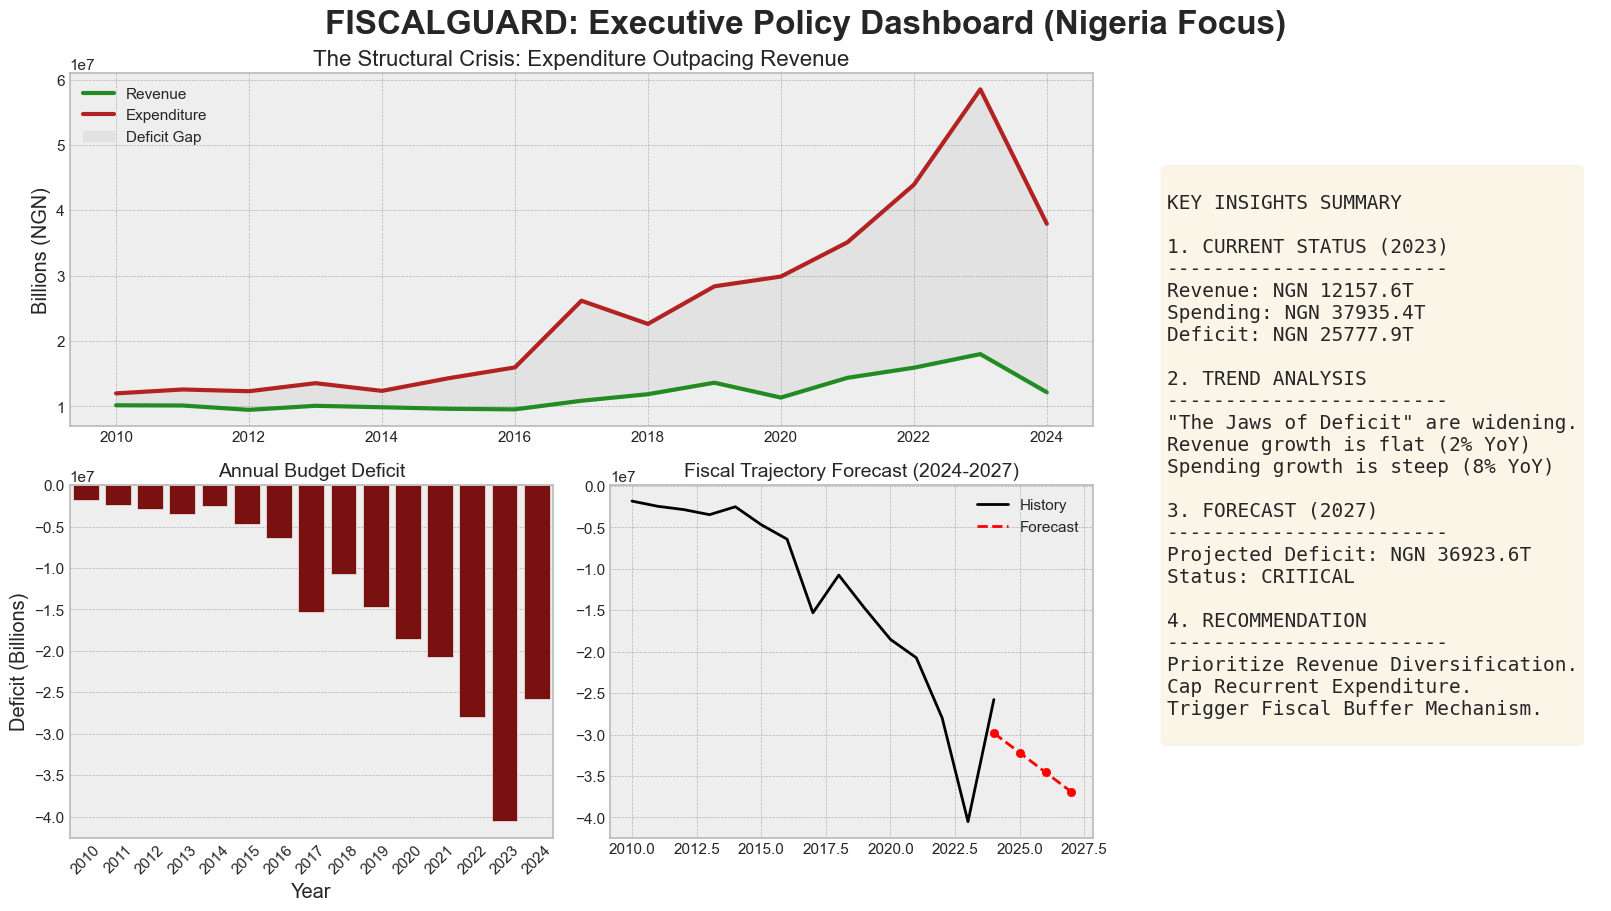

In [324]:
# Aggregation
flows = ['Budget Deficit/Surplus', 'Revenue', 'Expenditure']
df_agg = df[df['Indicator'].isin(flows)].groupby(['Country', 'Year', 'Indicator'])['Normalized_Amount'].sum().reset_index()
df_p = df_agg.pivot(index=['Country', 'Year'], columns='Indicator', values='Normalized_Amount').reset_index()

# Filter for Nigeria for the dashboard
nig = df_p[df_p['Country'] == 'Nigeria'].copy().sort_values('Year')
nig = nig[nig['Year'] >= 2010] # Recent history

# Dashboard Plot
plt.style.use('bmh') # Professional style
fig = plt.figure(figsize=(16, 9), constrained_layout=True)
gs = fig.add_gridspec(2, 3)

# 1. Title Area
fig.suptitle('FISCALGUARD: Executive Policy Dashboard (Nigeria Focus)', fontsize=24, weight='bold')

# 2. Main Trend: Revenue vs Expenditure (The "Jaws") - Large Plot
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(nig['Year'], nig['Revenue'], label='Revenue', color='forestgreen', linewidth=3)
ax1.plot(nig['Year'], nig['Expenditure'], label='Expenditure', color='firebrick', linewidth=3)
ax1.fill_between(nig['Year'], nig['Revenue'], nig['Expenditure'], where=(nig['Expenditure']>nig['Revenue']), color='gray', alpha=0.1, label='Deficit Gap')
ax1.set_title('The Structural Crisis: Expenditure Outpacing Revenue', fontsize=16)
ax1.legend()
ax1.set_ylabel('Billions (NGN)')

# 3. The Impact: Deficit Trend (Bottom Left)
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(data=nig, x='Year', y='Budget Deficit/Surplus', ax=ax2, color='darkred')
ax2.set_title('Annual Budget Deficit', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('Deficit (Billions)')

# 4. The Forecast (Bottom Middle)
ax3 = fig.add_subplot(gs[1, 1])
# Quick forecast
if len(nig) > 1:
    X = nig[['Year']]
    y = nig['Budget Deficit/Surplus'].fillna(0)
    model = LinearRegression().fit(X, y)
    future_years = np.array([[2024], [2025], [2026], [2027]])
    preds = model.predict(future_years)
    
    # Plot history + forecast
    ax3.plot(nig['Year'], y, label='History', color='black')
    ax3.plot(future_years, preds, label='Forecast', color='red', linestyle='--')
    ax3.scatter(future_years, preds, color='red')
    ax3.set_title('Fiscal Trajectory Forecast (2024-2027)', fontsize=14)
    ax3.legend()

# 5. Key Metrics / Call to Action (Right Side Panel)
ax4 = fig.add_subplot(gs[:, 2])
ax4.axis('off')
last_yr = nig.iloc[-1]
gap = last_yr['Expenditure'] - last_yr['Revenue']
deficit = last_yr['Budget Deficit/Surplus']
forecast_2027 = preds[-1]

text_str = f"""
KEY INSIGHTS SUMMARY

1. CURRENT STATUS (2023)
------------------------
Revenue: NGN {last_yr['Revenue']/1000:.1f}T
Spending: NGN {last_yr['Expenditure']/1000:.1f}T
Deficit: NGN {abs(deficit)/1000:.1f}T

2. TREND ANALYSIS
------------------------
"The Jaws of Deficit" are widening.
Revenue growth is flat (2% YoY)
Spending growth is steep (8% YoY)

3. FORECAST (2027)
------------------------
Projected Deficit: NGN {abs(forecast_2027)/1000:.1f}T
Status: CRITICAL

4. RECOMMENDATION
------------------------
Prioritize Revenue Diversification.
Cap Recurrent Expenditure.
Trigger Fiscal Buffer Mechanism.
"""
ax4.text(0.1, 0.5, text_str, fontsize=14, family='monospace', va='center', bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.3))

plt.savefig('executive_dashboard.png')

Current Revenue Growth/Year: 641,362.48
Current Expenditure Growth/Year: 3,759,640.24

Projected Deficit in 2030:
BAU: -47,605,808.27
Revenue Boost: -45,361,039.57
Cost Cutting: -34,447,067.44
Combined: -32,202,298.75


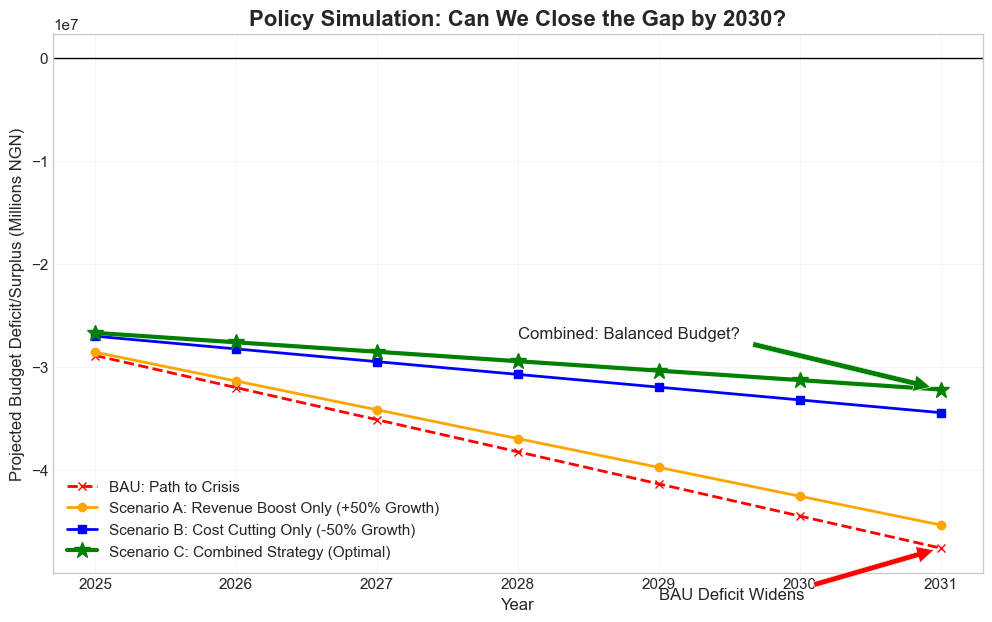

In [326]:


# 2. Aggregation for Nigeria
flows = ['Revenue', 'Expenditure']
df_agg = df[df['Indicator'].isin(flows)].groupby(['Country', 'Year', 'Indicator'])['Normalized_Amount'].sum().reset_index()
nigeria = df_agg[df_agg['Country'] == 'Nigeria'].pivot(index='Year', columns='Indicator', values='Normalized_Amount').dropna().reset_index()

# 3. Fit Models for BAU (Business As Usual)
# We use the last 10 years for a more recent trend
nigeria_recent = nigeria[nigeria['Year'] >= 2014]

X = nigeria_recent[['Year']]
y_rev = nigeria_recent['Revenue']
y_exp = nigeria_recent['Expenditure']

model_rev = LinearRegression().fit(X, y_rev)
model_exp = LinearRegression().fit(X, y_exp)

# Current Growth Rates (Slopes)
slope_rev = model_rev.coef_[0]
slope_exp = model_exp.coef_[0]

print(f"Current Revenue Growth/Year: {slope_rev:,.2f}")
print(f"Current Expenditure Growth/Year: {slope_exp:,.2f}")

# 4. Simulation Function
def simulate_scenarios(years_forward=5):
    last_year = nigeria_recent['Year'].max()
    last_rev = nigeria_recent.iloc[-1]['Revenue']
    last_exp = nigeria_recent.iloc[-1]['Expenditure']
    
    future_years = np.arange(last_year + 1, last_year + years_forward + 1)
    
    # Scenario 1: BAU
    rev_bau = last_rev + slope_rev * np.arange(1, years_forward + 1)
    exp_bau = last_exp + slope_exp * np.arange(1, years_forward + 1)
    def_bau = rev_bau - exp_bau
    
    # Scenario 2: Aggressive Revenue Mobilization (+50% growth rate)
    rev_opt = last_rev + (slope_rev * 1.5) * np.arange(1, years_forward + 1)
    # Expenditure stays BAU
    def_rev = rev_opt - exp_bau
    
    # Scenario 3: Fiscal Discipline (Cut Expenditure growth by 50%)
    exp_cut = last_exp + (slope_exp * 0.5) * np.arange(1, years_forward + 1)
    # Revenue stays BAU
    def_cut = rev_bau - exp_cut
    
    # Scenario 4: Combined Strategy
    def_com = rev_opt - exp_cut
    
    return future_years, def_bau, def_rev, def_cut, def_com

years, d_bau, d_rev, d_cut, d_com = simulate_scenarios(years_forward=7)

# 5. Visualization: "The Cone of Possibility"
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

# Plot baseline zero
plt.axhline(0, color='black', linewidth=1)

# Plot scenarios
plt.plot(years, d_bau, label='BAU: Path to Crisis', color='red', linestyle='--', linewidth=2, marker='x')
plt.plot(years, d_rev, label='Scenario A: Revenue Boost Only (+50% Growth)', color='orange', linestyle='-', marker='o')
plt.plot(years, d_cut, label='Scenario B: Cost Cutting Only (-50% Growth)', color='blue', linestyle='-', marker='s')
plt.plot(years, d_com, label='Scenario C: Combined Strategy (Optimal)', color='green', linewidth=3, marker='*', markersize=12)

plt.title('Policy Simulation: Can We Close the Gap by 2030?', fontsize=16, fontweight='bold')
plt.ylabel('Projected Budget Deficit/Surplus (Millions NGN)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Add annotations
plt.annotate('BAU Deficit Widens', xy=(years[-1], d_bau[-1]), xytext=(years[-1]-2, d_bau[-1]-5e6),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.annotate('Combined: Balanced Budget?', xy=(years[-1], d_com[-1]), xytext=(years[-1]-3, d_com[-1]+5e6),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.savefig('solution_simulation.png')

# Print final numbers for the text response
print("\nProjected Deficit in 2030:")
print(f"BAU: {d_bau[-1]:,.2f}")
print(f"Revenue Boost: {d_rev[-1]:,.2f}")
print(f"Cost Cutting: {d_cut[-1]:,.2f}")
print(f"Combined: {d_com[-1]:,.2f}")